
# Linear and K-Nearest Neighbors Regression with Scikit-Learn

This notebook builds on the previous **Simple Linear Regression** notebook where we manually computed regression parameters.  
Here, we use **scikit-learn** (`sklearn`) to implement the same linear regression model more efficiently, followed by an introduction to **K-Nearest Neighbors (KNN) Regression**.


In [2]:

import pandas as pd

df = pd.read_csv('data/1.01. Simple linear regression.csv')
df.head()


,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83



## Step 1: Split Dataset into Input and Output Variables

Here, `GPA` is treated as the input variable `x`, and `SAT` as the target output `y`.


In [3]:

x = df[['GPA']]
y = df[['SAT']]
x


,GPA
0,2.40
1,2.52
2,2.54
3,2.74
4,2.83
...,...
79,3.71
80,3.71
81,3.73
82,3.76



## Step 2: Train-Test Split

Use scikit-learn's `train_test_split` to randomly divide the dataset into training and testing subsets.


In [4]:

from sklearn import model_selection

xTrain, xTest, yTrain, yTest = model_selection.train_test_split(x, y, test_size=0.20, random_state=5)
xTrain


,GPA
42,3.38
13,3.08
48,3.41
58,3.47
26,3.28
...,...
8,3.01
73,3.60
16,3.17
61,3.49



## Step 3: Train a Linear Regression Model

We create and train a linear regression model using scikit-learn’s `LinearRegression` class.


In [ ]:

from sklearn import linear_model

#Creates an empty model object
model = linear_model.LinearRegression()

#Trains it on our dataset
model.fit(xTrain, yTrain)

b0 = model.intercept_
b1 = model.coef_
print("Slope (b1):", b1)


Slope (b1): [[229.47322229]]



## Step 4: Evaluate the Model

Generate predictions and evaluate the model using Mean Squared Error (MSE) and R-squared (R²) score to see how well our model predicts based on unseen data (xTest).


In [ ]:

yPredicted = model.predict(xTest)

from sklearn import metrics
mse = metrics.mean_squared_error(yTest, yPredicted)
r2 = metrics.r2_score(yTest, yPredicted)
print("R² Score:", r2)


R² Score: 0.3108294990811301



## Step 5: Visualize Linear Regression Fit


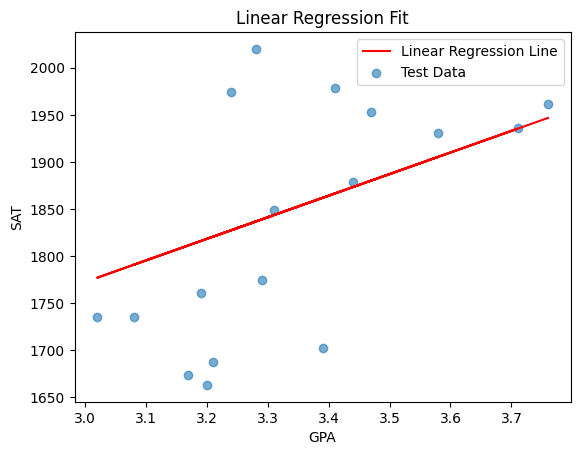

In [7]:

import matplotlib.pyplot as mlt

xx = xTest
yy = b1 * xTest + b0

mlt.plot(xx, yy, label="Linear Regression Line", color='red')
mlt.scatter(xTest, yTest, label="Test Data", alpha=0.6)
mlt.legend()
mlt.title("Linear Regression Fit")
mlt.xlabel("GPA")
mlt.ylabel("SAT")
mlt.show()



# K-Nearest Neighbors (KNN) Regression

Now, we switch to a non-parametric method: **KNN Regression**, which predicts output values based on the closest `k` neighbors in the training set.



## Step 6: Find Best `k` for KNN

We loop through various `k` values and use R² as our evaluation metric to find the best value.


In [8]:
from sklearn import neighbors

bestKval = 1
bestR2 = 0

# Try k values from 1 to 19 to find the number of neighbors that maximizes the R² score
for k in range(1, 20):
    # Create KNN regressor with k neighbors
    #'uniform' weighs all neighbours in x distance the same
    #'distance' weighs closer neigbours in x distance higher (more overfitted tho)
    KModel = neighbors.KNeighborsRegressor(k, weights='uniform')
    
    # Fit model on training data
    KModel.fit(xTrain, yTrain)
    # Predict on test data
    yPred = KModel.predict(xTest)
    # Calculate R² score for current k
    r2K = KModel.score(xTest, yTest)

    # If this k gives a better R², update bestKval and bestR2
    if round((100*r2K)) > round((100*bestR2)):
        bestR2 = r2K
        bestKval = k

print(f'Best k: {bestKval}, Best R² Score: {bestR2:.4f}')


Best k: 11, Best R² Score: 0.3109



### (Incorrect) Initial Plot — Do Not Use

This is a quick plot without sorting the x-values. The line appears squiggly and should be fixed.


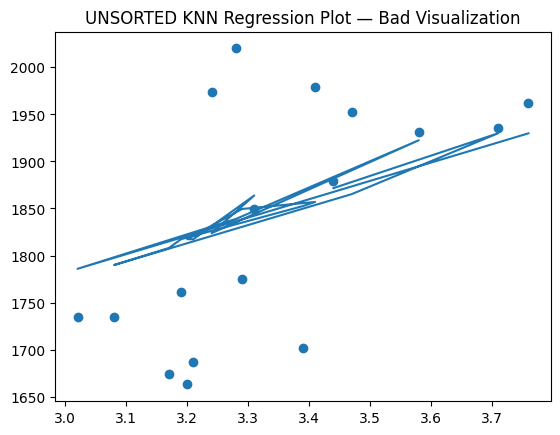

In [9]:

mlt.plot(xTest, yPred)
mlt.scatter(xTest, yTest)
mlt.title("UNSORTED KNN Regression Plot — Bad Visualization")
mlt.show()



## Step 7: Cleaned-Up KNN Plot

To properly visualize the KNN regression curve, we sort the x-values before plotting.


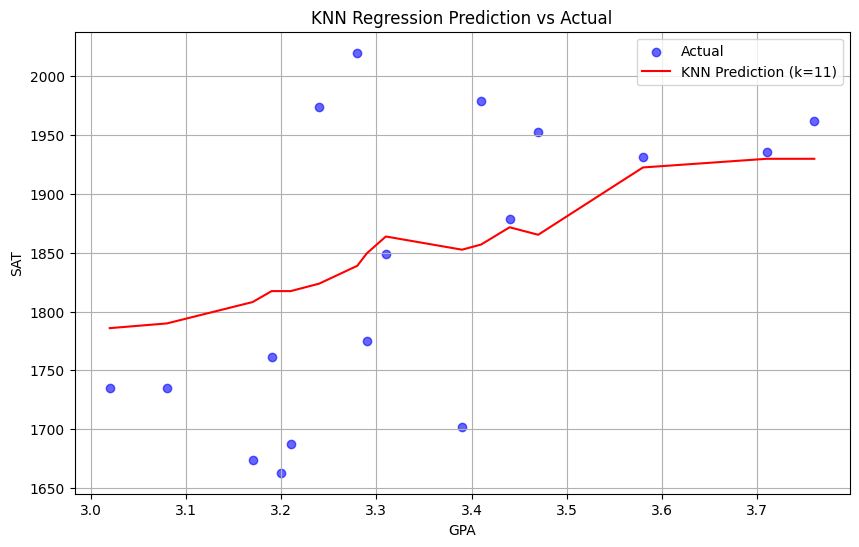

In [ ]:

import numpy as np

sorted_idx = np.argsort(xTest.values.flatten()) # flatten to ensure array is 1D for sorting
xTest_sorted = xTest.values.flatten()[sorted_idx]
yPred_sorted = yPred[sorted_idx]
yTest_sorted = yTest.values[sorted_idx]

mlt.figure(figsize=(10, 6))
mlt.scatter(xTest_sorted, yTest_sorted, label="Actual", color='blue', alpha=0.6)
mlt.plot(xTest_sorted, yPred_sorted, label=f"KNN Prediction (k={bestKval})", color='red')
mlt.xlabel("GPA")
mlt.ylabel("SAT")
mlt.title("KNN Regression Prediction vs Actual")
mlt.legend()
mlt.grid(True)
mlt.show()
